<a href="https://colab.research.google.com/github/navidnaji/Binary-Classification-Training/blob/main/analyze_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive2

from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
folder_id = '1Vc3MxTi4CKjkqCVY6fkrwfYvQAfG21zh'

file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()

downloaded_files = []

for file in file_list:
    file_name = file['title']
    if file_name.endswith('.raw'):
        prefix = file_name.split('_')[0]  # e.g., '1', '2', '3', etc.
        if prefix.isdigit() and int(prefix) in [34]:
            print(f" Downloading {file_name}...")
            file.GetContentFile(file_name)
            downloaded_files.append(file_name)

print(" Downloaded files:", downloaded_files)

 Downloaded files: []


In [ ]:
print(raw)
print(raw.info)

<RawEGI | 22_T2_TSST 20250429 1627.raw, 133 x 1139846 (2279.7 s), ~1.13 GiB, data loaded>
<Info | 9 non-empty values
 bads: []
 ch_names: E2, E3, E4, E5, E6, E7, E9, E10, E11, E12, E13, E14, E15, E16, ...
 chs: 124 EEG, 7 Stimulus, 2 EOG
 custom_ref_applied: True
 dig: 0 items
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2025-04-29 16:58:18 UTC
 nchan: 133
 projs: []
 sfreq: 500.0 Hz
>


Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
Using matplotlib as 2D backend.


/tmp/ipython-input-3186301473.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)


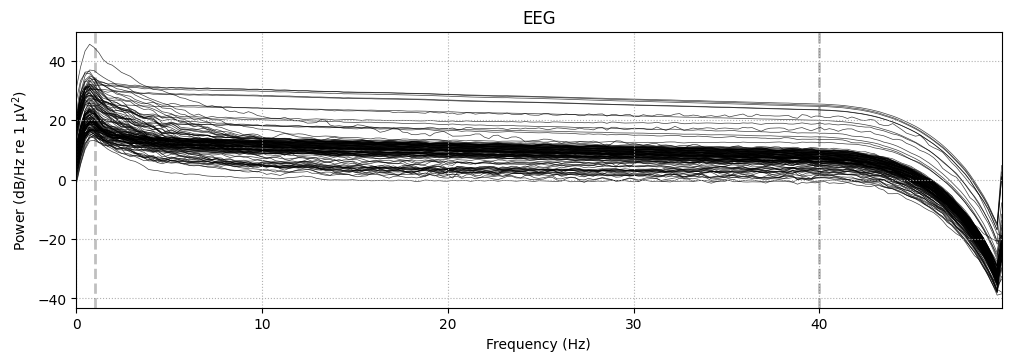

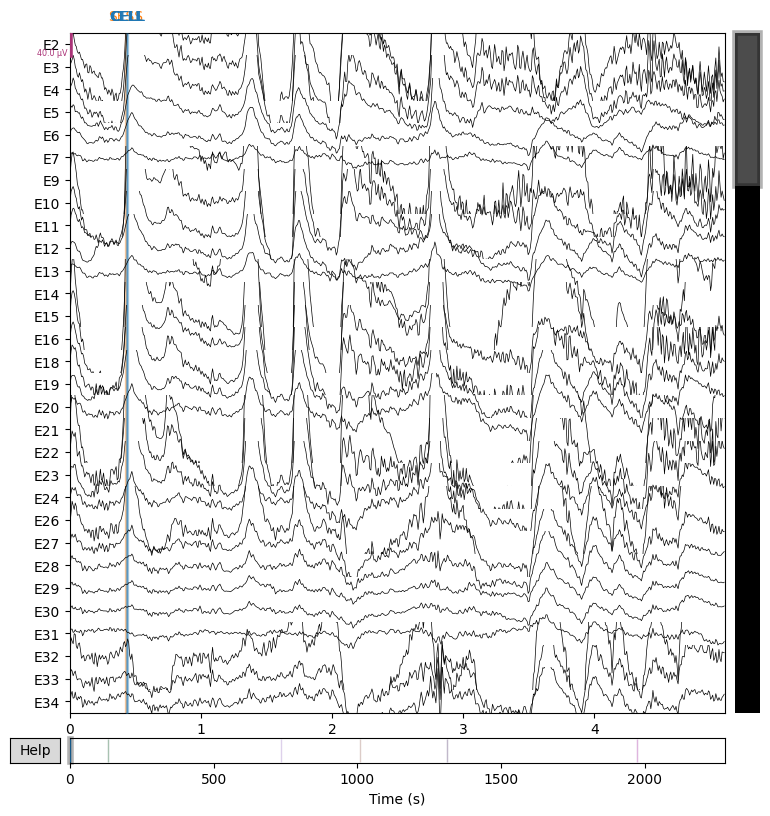

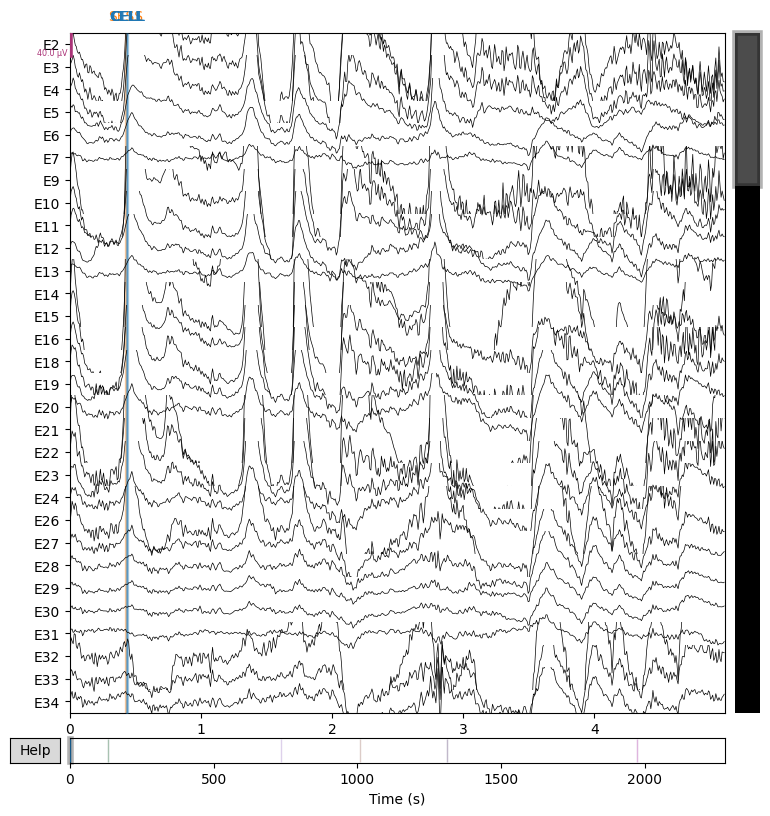

In [ ]:
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
raw.plot(duration=5, n_channels=30)

In [ ]:
print(downloaded_files)

[]


In [ ]:
!pip install mne
import mne

raw_data = {}

for file_name in downloaded_files:
    print(f"Loading {file_name} with EGI loader...")
    raw = mne.io.read_raw_egi(file_name, preload=True)
    raw_data[file_name] = raw


In [115]:
print(raw)
print(raw.ch_names)
print(raw.info)

<RawEGI | 22_T2_TSST 20250429 1627.raw, 133 x 1139846 (2279.7 s), ~1.13 GiB, data loaded>
['E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66', 'E67', 'E68', 'E69', 'E70', 'E71', 'E72', 'E73', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124', 'E125', 'E126', 'E127', 'E128', 'CELL', 'SESS', 'ba

duration of each trigers, and there wasnt any triger for end so calculate reco and end as recovery phase

[0.000000e+00 2.000000e-03 4.000000e-03 ... 2.279686e+03 2.279688e+03
 2.279690e+03]


In [ ]:
# Get total duration of EEG recording
total_duration = raw.times[-1]

# Extract all annotations
annotations = raw.annotations

# Rename stimulus channels for easier event finding
raw.rename_channels({'bgin': 'STI 014', 'CELL': 'BAD_stim', 'SESS': 'BAD_stim', 'base': 'BAD_stim', 'prep': 'BAD_stim', 'reco': 'BAD_stim', 'spee': 'BAD_stim'})


# Loop through annotations and print segment durations
print("🧠 Annotation Segment Durations:\n")

for i, ann in enumerate(annotations):
    label = ann['description']
    start = ann['onset']

    # If not the last annotation, compare with next onset
    if i + 1 < len(annotations):
        next_label = annotations[i + 1]['description']
        end = annotations[i + 1]['onset']
    else:
        next_label = "END"
        end = total_duration  # Use end of data for final duration

    duration = end - start
    print(f"{label:<5} starts at {start:8.2f}s — ends ~{next_label:<5} at {end:8.2f}s ➤ duration ≈ {duration:8.2f}s")

print(f"\n📏 Total recording duration: {total_duration:.2f}s")

🧠 Annotation Segment Durations:

SESS  starts at     0.42s — ends ~CELL  at     0.43s ➤ duration ≈     0.01s
CELL  starts at     0.43s — ends ~CELL  at     0.43s ➤ duration ≈     0.00s
CELL  starts at     0.43s — ends ~CELL  at     0.44s ➤ duration ≈     0.00s
CELL  starts at     0.44s — ends ~CELL  at     0.44s ➤ duration ≈     0.00s
CELL  starts at     0.44s — ends ~bgin  at   133.38s ➤ duration ≈   132.94s
bgin  starts at   133.38s — ends ~base  at   133.39s ➤ duration ≈     0.02s
base  starts at   133.39s — ends ~bgin  at   734.07s ➤ duration ≈   600.67s
bgin  starts at   734.07s — ends ~prep  at  1010.90s ➤ duration ≈   276.84s
prep  starts at  1010.90s — ends ~bgin  at  1311.96s ➤ duration ≈   301.06s
bgin  starts at  1311.96s — ends ~spee  at  1311.97s ➤ duration ≈     0.01s
spee  starts at  1311.97s — ends ~bgin  at  1974.33s ➤ duration ≈   662.36s
bgin  starts at  1974.33s — ends ~reco  at  1974.34s ➤ duration ≈     0.01s
reco  starts at  1974.34s — ends ~END   at  2279.69s ➤ 

AttributeError: 'RawEGI' object has no attribute 'prep'

cleaning:
1. Filter the data
2. set EEG reference ans average
3. Tell MNE which channels are EOG (e.g., vEOG, hEOG)
4. Fit ICA
5. Detect bad components (EOG artifacts)
6. Exclude & apply ICA
7. Re-reference to average again


In [122]:
raw.filter(1., 40., fir_design='firwin', verbose=False)

raw.set_eeg_reference('average', projection=True, verbose=False)

<RawEGI | 22_T2_TSST 20250429 1627.raw, 133 x 1139846 (2279.7 s), ~1.13 GiB, data loaded>

In [ ]:
raw.set_channel_types({'vEOG': 'eog', 'hEOG': 'eog'})


<RawEGI | 22_T2_TSST 20250429 1627.raw, 133 x 1139846 (2279.7 s), ~1.13 GiB, data loaded>

In [ ]:
from mne.preprocessing import ICA

# Fit ICA
ica = ICA(n_components=20, random_state=97, max_iter='auto')
ica.fit(raw)

# Detect EOG artifacts from vEOG and hEOG
eog_inds_v, _ = ica.find_bads_eog(raw, ch_name='vEOG')
eog_inds_h, _ = ica.find_bads_eog(raw, ch_name='hEOG')
ica.exclude = list(set(eog_inds_v + eog_inds_h))

# Apply ICA to clean the data
raw_clean = raw.copy()
ica.apply(raw_clean)


Fitting ICA to data using 124 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 228.5s.
Using EOG channel: vEOG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz 

<RawEGI | 22_T2_TSST 20250429 1627.raw, 133 x 1139846 (2279.7 s), ~1.13 GiB, data loaded>

In [ ]:
raw_clean.set_eeg_reference('average', projection=False)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEGI | 22_T2_TSST 20250429 1627.raw, 133 x 1139846 (2279.7 s), ~1.13 GiB, data loaded>

In [123]:
print(clean_epochs)

{'base': <RawEGI | 22_T2_TSST 20250429 1627.raw, 133 x 438755 (877.5 s), ~445.4 MiB, data loaded>, 'prep': <RawEGI | 22_T2_TSST 20250429 1627.raw, 133 x 150534 (301.1 s), ~152.9 MiB, data loaded>, 'spee': <RawEGI | 22_T2_TSST 20250429 1627.raw, 133 x 331185 (662.4 s), ~336.2 MiB, data loaded>, 'reco': <RawEGI | 22_T2_TSST 20250429 1627.raw, 133 x 152678 (305.4 s), ~155.1 MiB, data loaded>}



📊 Computing PSD for 'base' segment...
Effective window size : 4.096 (s)


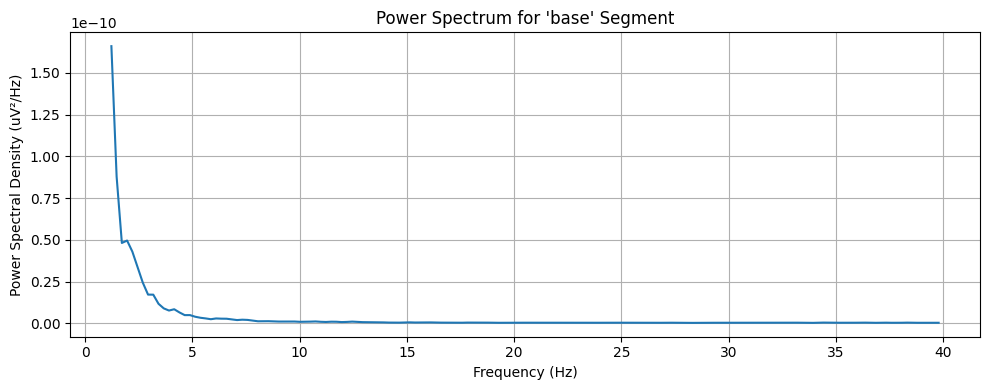


📊 Computing PSD for 'prep' segment...
Effective window size : 4.096 (s)


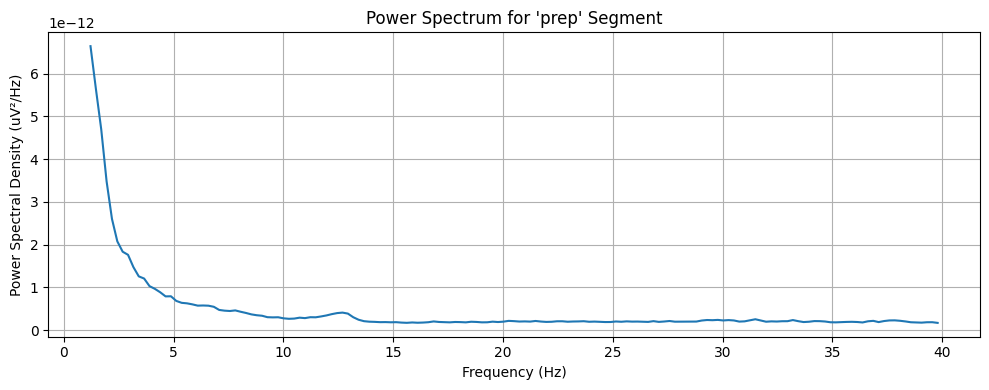


📊 Computing PSD for 'spee' segment...
Effective window size : 4.096 (s)


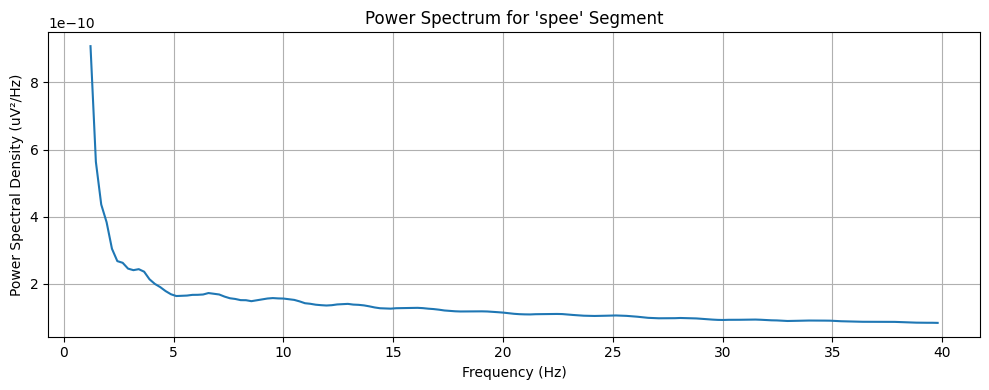


📊 Computing PSD for 'reco' segment...
Effective window size : 4.096 (s)


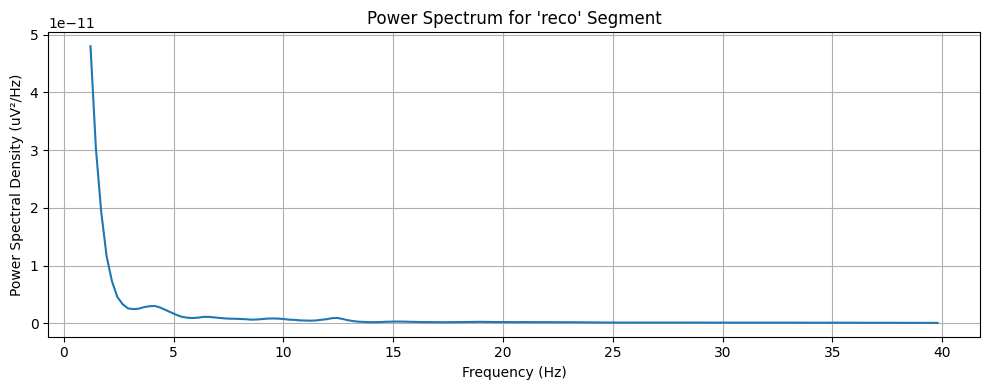

In [ ]:
import mne
import matplotlib.pyplot as plt
import numpy as np

# Loop over your clean segments (assuming you have a dictionary `clean_epochs`)
for label, seg in clean_epochs.items():
    print(f"\n📊 Computing PSD for '{label}' segment...")

    # Compute PSD using the Raw object's built-in method
    psd, freqs = seg.compute_psd(fmin=1, fmax=40).get_data(return_freqs=True)

    # Average across all channels
    mean_psd = psd.mean(axis=0)

    # Plot the power spectrum
    plt.figure(figsize=(10, 4))
    plt.plot(freqs, mean_psd)
    plt.title(f"Power Spectrum for '{label}' Segment")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density (uV²/Hz)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



📊 Computing PSD and average band power for 'base' segment...
Effective window size : 4.096 (s)

📈 Average Band Power — 'base' Segment:
🔹 Delta (1–4 Hz): 4.296e-11 µV²/Hz
🔹 Theta (4–8 Hz): 3.542e-12 µV²/Hz
🔹 Alpha (8–13 Hz): 1.041e-12 µV²/Hz
🔹 Beta (13–30 Hz): 4.275e-13 µV²/Hz


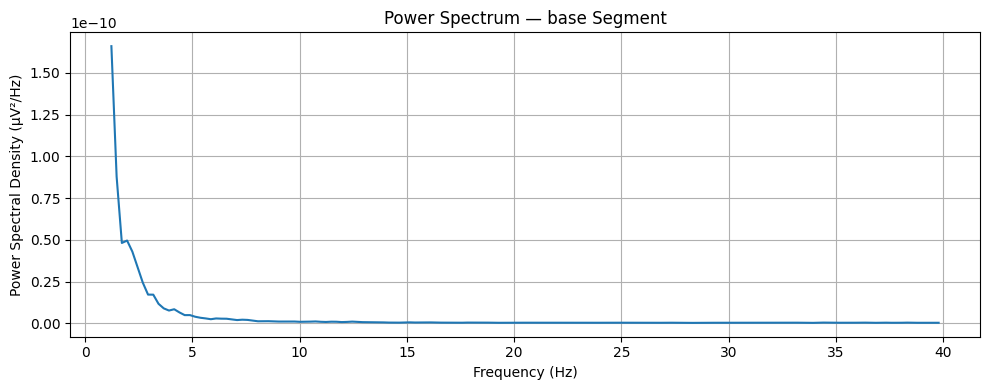


📊 Computing PSD and average band power for 'prep' segment...
Effective window size : 4.096 (s)

📈 Average Band Power — 'prep' Segment:
🔹 Delta (1–4 Hz): 2.811e-12 µV²/Hz
🔹 Theta (4–8 Hz): 6.330e-13 µV²/Hz
🔹 Alpha (8–13 Hz): 3.362e-13 µV²/Hz
🔹 Beta (13–30 Hz): 2.022e-13 µV²/Hz


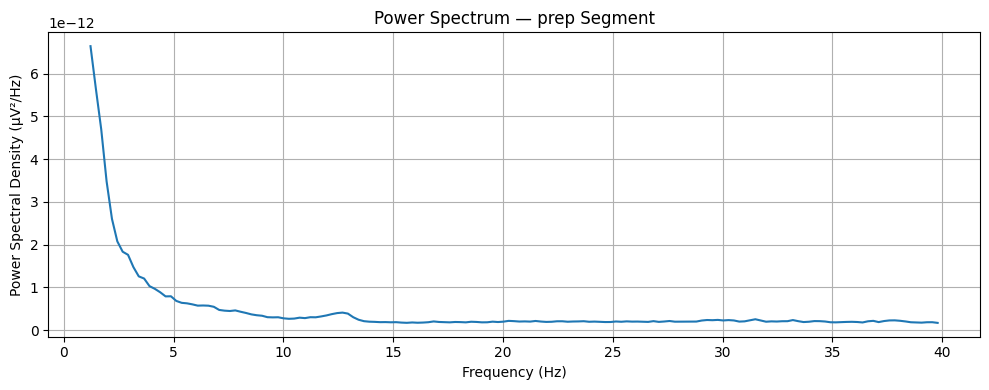


📊 Computing PSD and average band power for 'spee' segment...
Effective window size : 4.096 (s)

📈 Average Band Power — 'spee' Segment:
🔹 Delta (1–4 Hz): 3.590e-10 µV²/Hz
🔹 Theta (4–8 Hz): 1.704e-10 µV²/Hz
🔹 Alpha (8–13 Hz): 1.473e-10 µV²/Hz
🔹 Beta (13–30 Hz): 1.127e-10 µV²/Hz


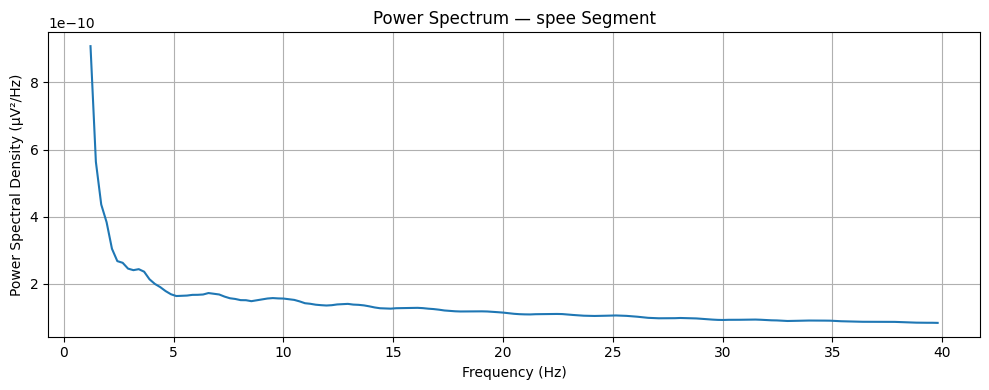


📊 Computing PSD and average band power for 'reco' segment...
Effective window size : 4.096 (s)

📈 Average Band Power — 'reco' Segment:
🔹 Delta (1–4 Hz): 1.149e-11 µV²/Hz
🔹 Theta (4–8 Hz): 1.388e-12 µV²/Hz
🔹 Alpha (8–13 Hz): 6.929e-13 µV²/Hz
🔹 Beta (13–30 Hz): 2.000e-13 µV²/Hz


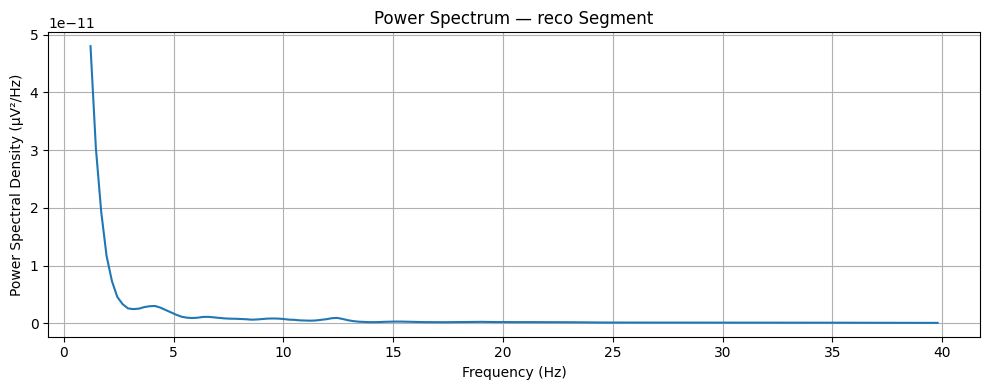

In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Define EEG bands
bands = {
    'Delta (1–4 Hz)': (1, 4),
    'Theta (4–8 Hz)': (4, 8),
    'Alpha (8–13 Hz)': (8, 13),
    'Beta (13–30 Hz)': (13, 30)
}

# Loop through clean segments
for label, seg in clean_epochs.items():
    print(f"\n📊 Computing PSD and average band power for '{label}' segment...")

    # Compute PSD
    psd, freqs = seg.compute_psd(fmin=1, fmax=40).get_data(return_freqs=True)

    # Average across channels
    mean_psd = psd.mean(axis=0)

    # Print average power in each band
    print(f"\n📈 Average Band Power — '{label}' Segment:")
    for band_name, (fmin, fmax) in bands.items():
        # Find indices for frequency range
        idx_band = np.logical_and(freqs >= fmin, freqs <= fmax)
        # Compute average power
        band_power = mean_psd[idx_band].mean()
        print(f"🔹 {band_name}: {band_power:.3e} µV²/Hz")

    # Optional: plot the spectrum
    plt.figure(figsize=(10, 4))
    plt.plot(freqs, mean_psd)
    plt.title(f"Power Spectrum — {label} Segment")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density (µV²/Hz)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [ ]:
!pip install mne --quiet


In [ ]:
# Assign standard 128-channel EGI montage
montage = mne.channels.make_standard_montage('GSN-HydroCel-128')
raw_clean.set_montage(montage)

# If using cropped segment like 'baseline', you may need to set it there too:
for segment in clean_epochs.values():
    segment.set_montage(montage)


In [ ]:
print(segment_data_eeg)

<RawEGI | 22_T2_TSST 20250429 1627.raw, 124 x 152678 (305.4 s), ~144.6 MiB, data loaded>



🧠 Plotting EEG bands for 'base' segment...
Effective window size : 4.096 (s)


/tmp/ipython-input-4272520175.py:57: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


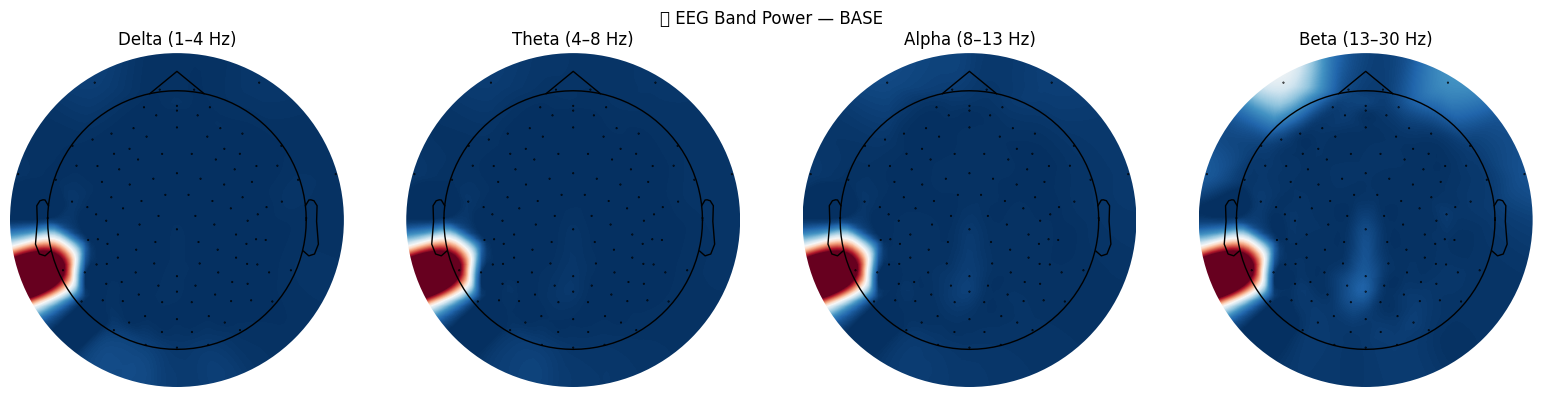


🧠 Plotting EEG bands for 'prep' segment...
Effective window size : 4.096 (s)


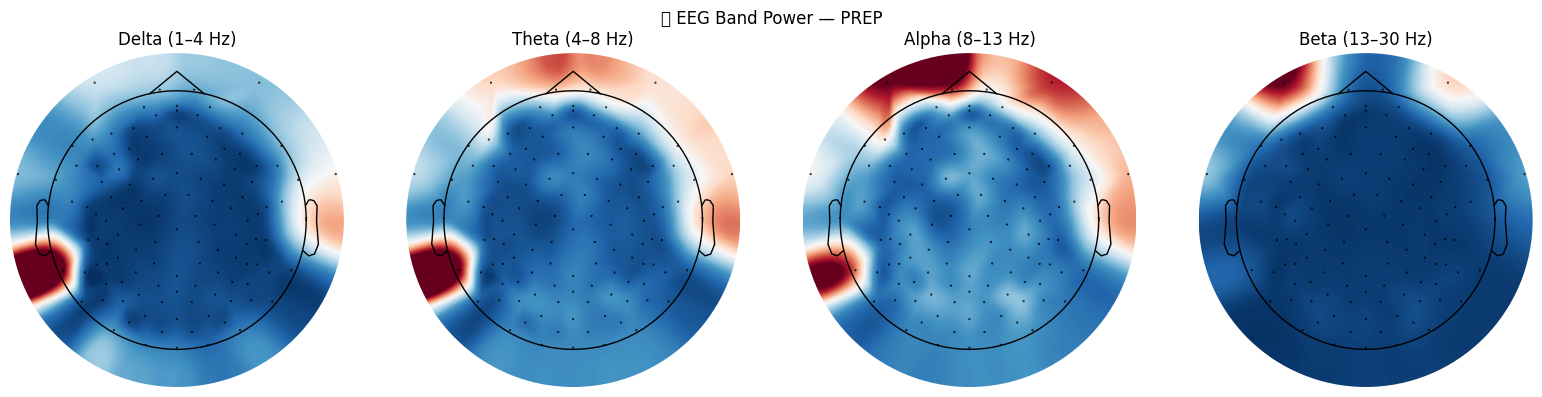


🧠 Plotting EEG bands for 'spee' segment...
Effective window size : 4.096 (s)


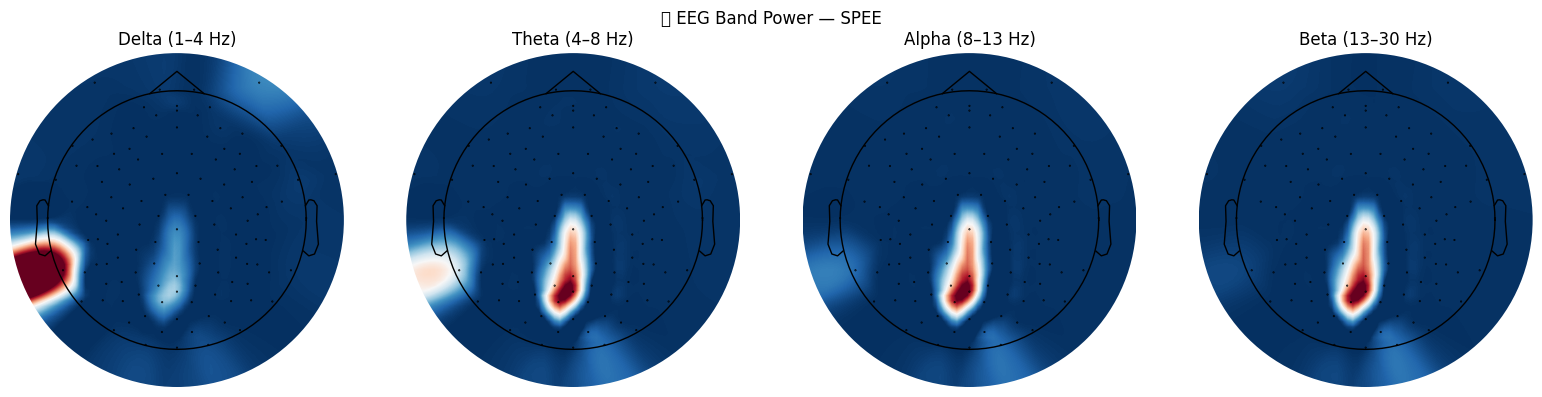


🧠 Plotting EEG bands for 'reco' segment...
Effective window size : 4.096 (s)


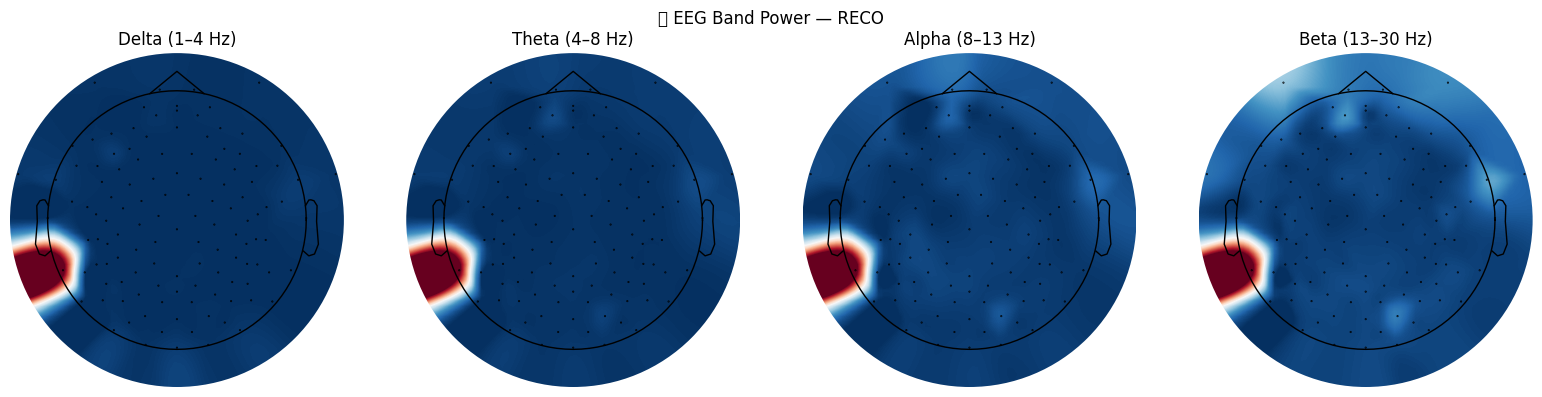

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_welch
from mne.viz import plot_topomap
import mne

# Define EEG bands
bands = {
    'Delta (1–4 Hz)': (1, 4),
    'Theta (4–8 Hz)': (4, 8),
    'Alpha (8–13 Hz)': (8, 13),
    'Beta (13–30 Hz)': (13, 30)
}

# Plot topomaps
for segment_name, segment_data in clean_epochs.items():
    print(f"\n🧠 Plotting EEG bands for '{segment_name}' segment...")

    # Select only EEG channels from the segment data and info
    eeg_picks = mne.pick_types(segment_data.info, meg=False, eeg=True, eog=False, stim=False)
    segment_data_eeg = segment_data.copy().pick(eeg_picks)

    # Load and apply a standard montage for EGI 128
    montage = mne.channels.make_standard_montage('GSN-HydroCel-128')
    segment_data_eeg.set_montage(montage)

    # Get data (n_channels x n_times) for EEG channels only
    data = segment_data_eeg.get_data()
    sfreq = segment_data_eeg.info['sfreq']

    # Compute PSD: shape (n_channels, n_freqs) for EEG channels
    psds, freqs = psd_array_welch(data, sfreq=sfreq, fmin=1, fmax=30, n_fft=2048)


    # Prepare figure
    fig, axes = plt.subplots(1, len(bands), figsize=(16, 4))
    fig.suptitle(f"🧠 EEG Band Power — {segment_name.upper()}")

    for ax, (band_name, (fmin, fmax)) in zip(axes, bands.items()):
        # Find freq indices
        idx_band = np.logical_and(freqs >= fmin, freqs <= fmax)

        # Mean power in the band for each channel
        band_power = psds[:, idx_band].mean(axis=1)

        # Plot topomap using info for EEG channels only
        plot_topomap(
            band_power,
            segment_data_eeg.info, # Use info for EEG channels with montage
            axes=ax,
            show=False,
            contours=0,
            cmap='RdBu_r',
        )
        ax.set_title(band_name)

    plt.tight_layout()
    plt.show()


🧠 QEEG Topomap for 'base' segment:
Effective window size : 4.096 (s)


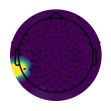

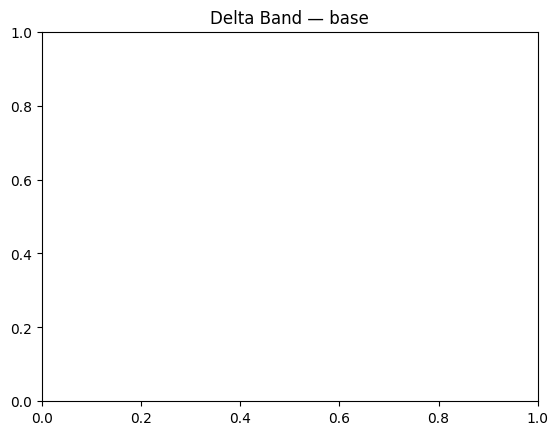

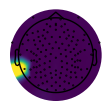

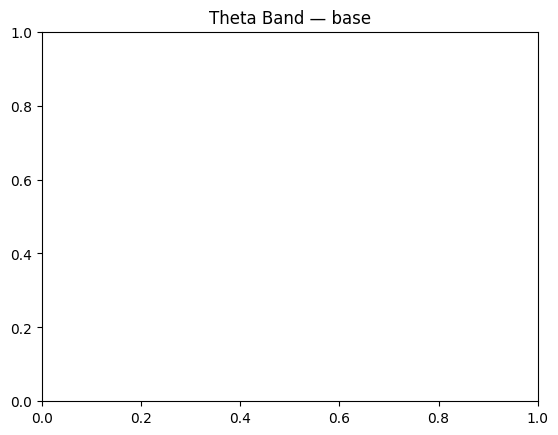

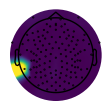

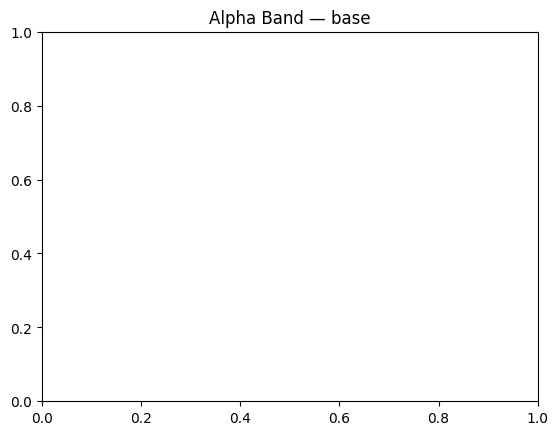

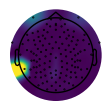

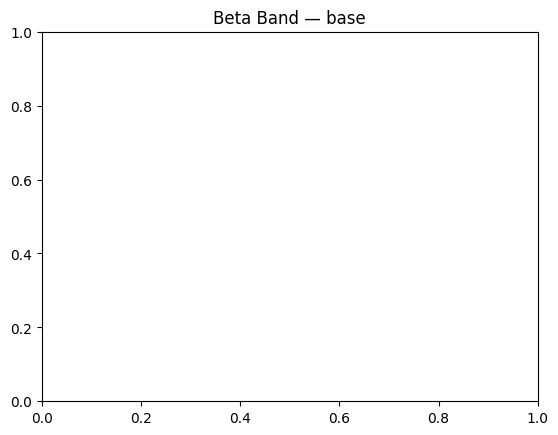


🧠 QEEG Topomap for 'prep' segment:
Effective window size : 4.096 (s)


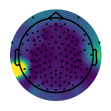

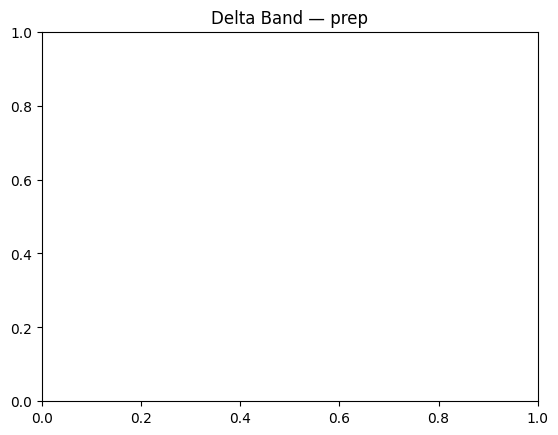

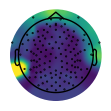

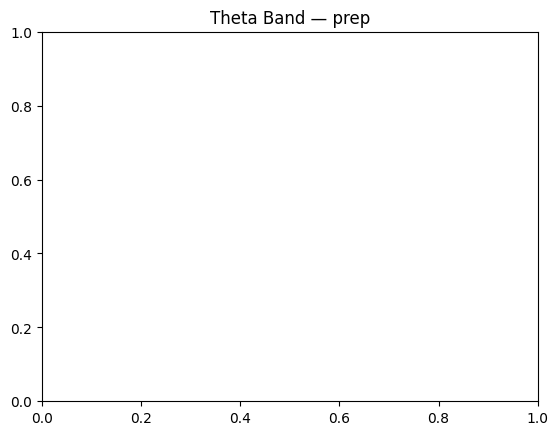

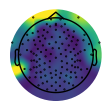

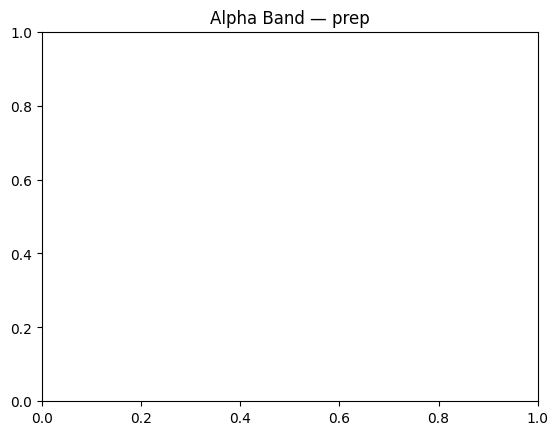

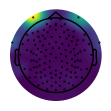

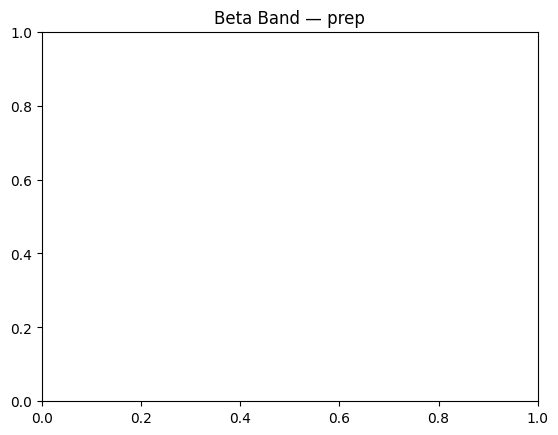


🧠 QEEG Topomap for 'spee' segment:
Effective window size : 4.096 (s)


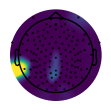

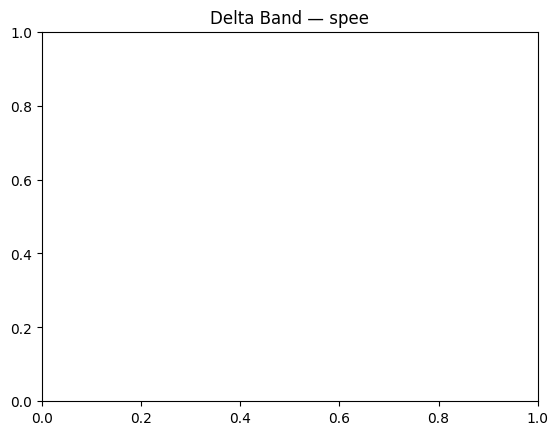

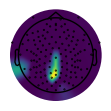

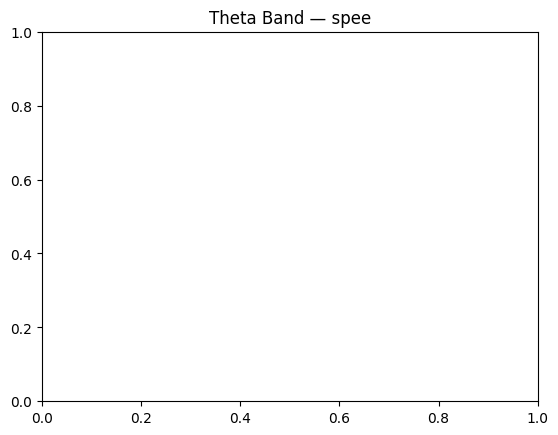

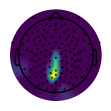

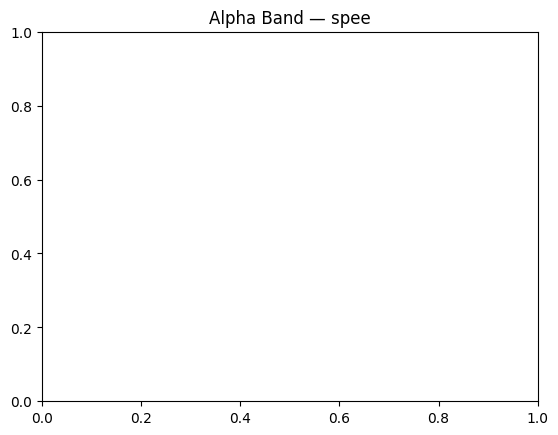

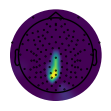

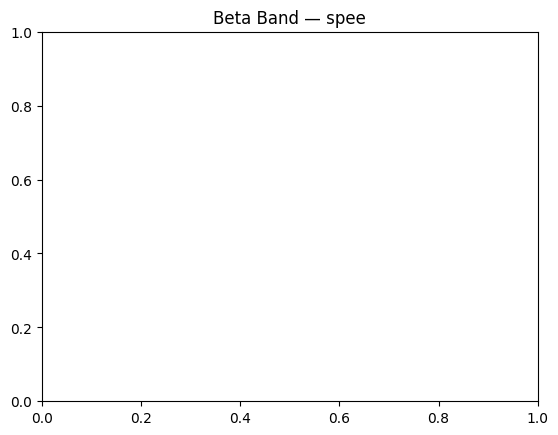


🧠 QEEG Topomap for 'reco' segment:
Effective window size : 4.096 (s)


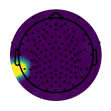

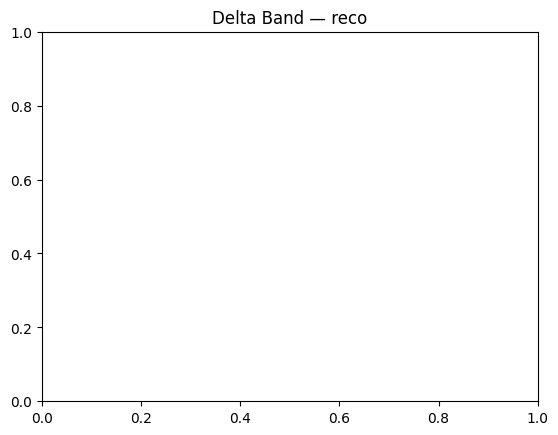

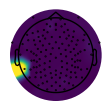

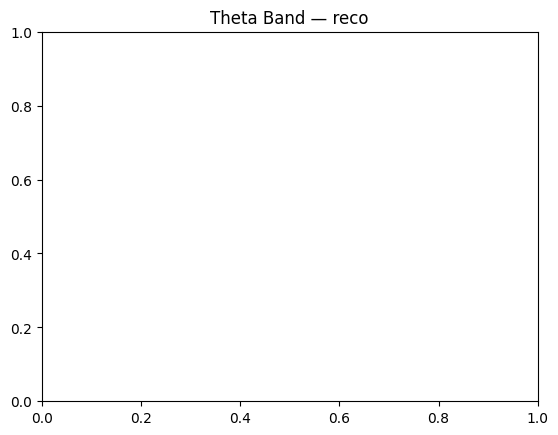

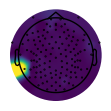

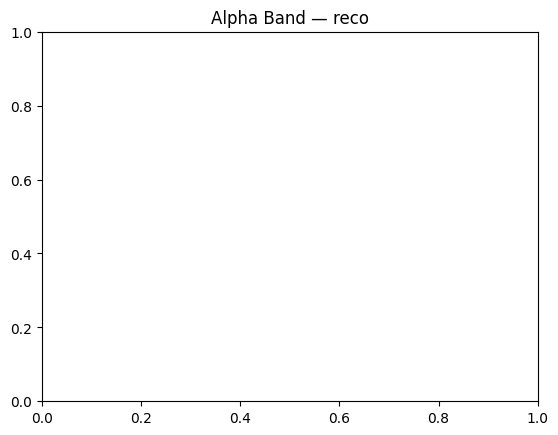

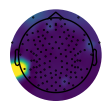

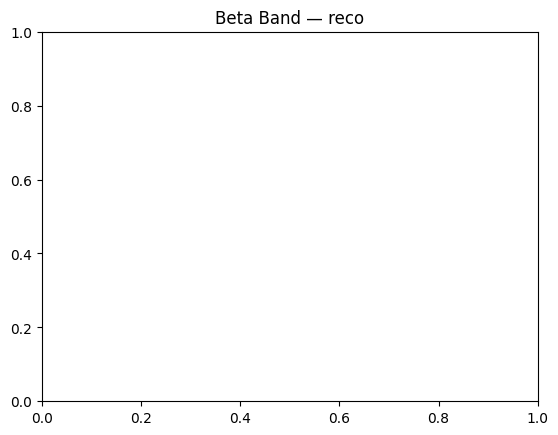

In [ ]:
import numpy as np
import mne
import matplotlib.pyplot as plt

# Define EEG frequency bands
bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta':  (13, 30),
}

# Loop over EEG segments
for label, seg in clean_epochs.items():
    print(f"\n🧠 QEEG Topomap for '{label}' segment:")

    # Set montage if not already set
    if not seg.get_montage():
        seg.set_montage('GSN-HydroCel-128')  # Adjust if your cap is different

    # Compute PSD
    psd, freqs = seg.compute_psd(fmin=1, fmax=40).get_data(return_freqs=True)

    for band_name, (fmin, fmax) in bands.items():
        band_idx = np.where((freqs >= fmin) & (freqs <= fmax))[0]
        band_power_per_channel = psd[:, band_idx].mean(axis=1)

        # Plot QEEG Topomap
        mne.viz.plot_topomap(
            band_power_per_channel,
            seg.info,
            cmap='viridis',
            contours=0,
            sphere=0.1
        )
        plt.title(f"{band_name} Band — {label}")
        plt.show()
